# Exercises - Decision Tree
## Using the titanic data, in your `classification-exercises` repository, create a notebook, `model.ipynb` where you will do the following:

In [256]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [154]:
df_titanic = acquire.get_titanic_data()

In [155]:
df_titanic = prepare.prep_titanicb(df_titanic)

In [156]:
df_titanic.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,embarked,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,0,3,22.0,1,0,7.2500,S,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,2,1,3,26.0,0,0,7.9250,S,1,1,0,0,1
3,3,1,1,35.0,1,0,53.1000,S,0,1,0,0,1
4,4,0,3,35.0,0,0,8.0500,S,1,0,0,0,1


In [157]:
df_titanic.drop(columns=['passenger_id', 'embarked'], inplace=True)
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,is_female,embark_Cherbourg,embark_Queenstown,embark_Southampton
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


In [158]:
# Target = Survived
train_titanic, validate_titanic, test_titanic = prepare.split_data(df_titanic, 'survived')

Prepared df: (712, 11)

Train: (426, 11)
Validate: (143, 11)
Test: (143, 11)


In [159]:
train_titanic.survived.value_counts(normalize=True)

0    0.596244
1    0.403756
Name: survived, dtype: float64

### Step 1: What is your baseline prediction? 
> `Remember`: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.  

> Baseline prediction is that the passenger did not survive  
* `survived == 0`


### Step 1a: What is your baseline accuracy? 

In [160]:
X_train = train_titanic.drop(columns=['survived'])
y_train = train_titanic.survived

X_validate = validate_titanic.drop(columns=['survived'])
y_validate = validate_titanic.survived

X_test = test_titanic.drop(columns=['survived'])
y_test = test_titanic.survived

In [161]:
baseline_acc = (y_train == 0).mean()

In [162]:
print(f'Baseline accuracy for non-survival prediction on the Titanic Dataset is: {baseline_acc: .2}')

Baseline accuracy for non-survival prediction on the Titanic Dataset is:  0.6


### Step 2: Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

> Follow in practice steps

In [163]:
# create object
clf_titanic = DecisionTreeClassifier(max_depth=3, random_state=123)

In [164]:
#fit the model --> model.fit(X,y)
clf_titanic = clf_titanic.fit(X_train, y_train)

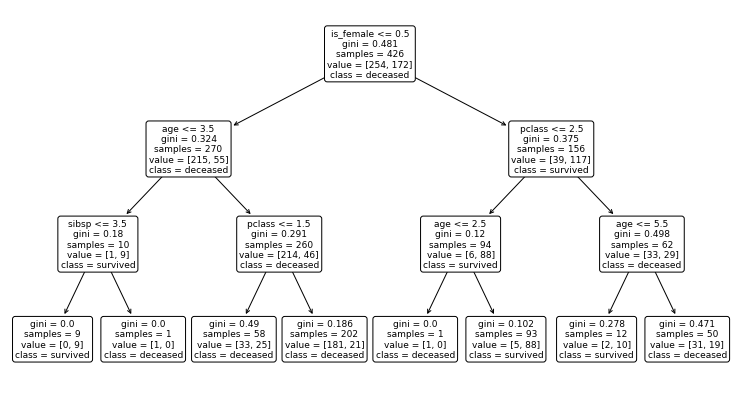

In [165]:
#viz the decision tree
# you need to convert the class names away from 0,1 --> deceased, survived
plt.figure(figsize=(13,7))
plot_tree(clf_titanic, feature_names=X_train.columns.to_list(), class_names=['deceased', 'survived'], rounded=True);

In [166]:
# Make Predictions
y_pred = clf_titanic.predict(X_train)


In [167]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [168]:
# Estimate Probability 
y_pred_proba = clf_titanic.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.8960396 , 0.1039604 ],
       [0.8960396 , 0.1039604 ],
       [0.8960396 , 0.1039604 ],
       [0.05376344, 0.94623656],
       [0.8960396 , 0.1039604 ]])

### Step 3: Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [169]:
#compute accuracy 
print(f'Accuracy of Decision Tree classifier on training set: {clf_titanic.score(X_train, y_train)}')

Accuracy of Decision Tree classifier on training set: 0.8309859154929577


In [170]:
#create confusion matrix --> positive == survived, negatives == deceased
confusion_titanic = confusion_matrix(y_train, y_pred)

#assign results of confusion matrix to variables
true_negative = confusion_titanic[0,0]
false_positive = confusion_titanic[0,1]
false_negative = confusion_titanic[1,0]
true_positive = confusion_titanic[1,1]

#print out for easier ounderstanding
print(f'True Negatives: {true_negative}')
print(f'False Positives: {false_positive}')
print(f'False Negative: {false_negative}')
print(f'True Positives: {true_positive}')

True Negatives: 247
False Positives: 7
False Negative: 65
True Positives: 107


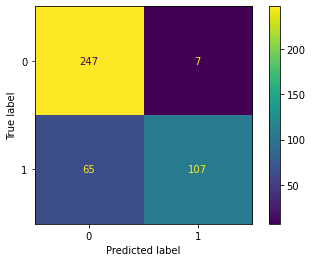

In [171]:
disp = ConfusionMatrixDisplay(confusion_titanic, display_labels=clf_titanic.classes_)
disp.plot()
plt.show()

In [172]:
#get the classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.791667,0.938596,0.830986,0.865132,0.850990
recall,0.972441,0.622093,0.830986,0.797267,0.830986
f1-score,0.872792,0.748252,0.830986,0.810522,0.822508
support,254.000000,172.000000,0.830986,426.000000,426.000000


### Step 4: Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [173]:
#accuracy
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f'Accuracy: {accuracy}')

#true positive rate/ recall
recall = true_positive / (true_positive +false_negative)
print(f'True Positive Rate/Recall: {recall} ')

#false positive rate
false_positive_rate = false_positive / (true_negative + false_positive)
print(f'False Positive Rate: {false_positive_rate} ')

#true negative rate
true_negative_rate = true_negative / (true_negative + false_positive)
print(f'True Negative Rate: {true_negative_rate}')

#false negative rate
false_negative_rate = false_negative / (false_negative + true_positive)
print(f'False Negative Rate: {false_negative_rate}')

#precision
precision = true_positive / (true_positive + false_positive)
print(f'Precision: {precision}')

#f1-score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1_score}')

#support
support_positive = true_positive + false_negative
support_negative = false_positive + true_negative
print(f'Support Positive: {support_positive} \nSupport Negative: {support_negative}')

Accuracy: 0.8309859154929577
True Positive Rate/Recall: 0.622093023255814 
False Positive Rate: 0.027559055118110236 
True Negative Rate: 0.9724409448818898
False Negative Rate: 0.37790697674418605
Precision: 0.9385964912280702
F1-Score: 0.7482517482517483
Support Positive: 172 
Support Negative: 254


In [250]:
#collect data from original model that was built piecemeal for exercise
statistics = ['Accuracy/Score',
    'True Positives' , 'False Postives', 'True Negatives', 'False Negatives', \
    'TPR/Recall', 'False Positive Rate', 'True Negative Rate', 'False Negative Rate', \
    'Precision', 'F1-Score', 'Support Positive', 'Support Negative']

calculated = [accuracy, true_positive, false_positive, true_negative, false_negative,\
                        recall, false_positive_rate, true_negative_rate, false_negative_rate, \
                        precision, f1_score, support_positive, support_negative]

comparison_chart = pd.DataFrame({'model1': calculated}, index=statistics)


### Run through steps 2-4 using a different max_depth value.



In [175]:
comparison_chart

,model1
Accuracy,0.830986
True Positives,107.000000
False Postives,7.000000
True Negatives,247.000000
False Negatives,65.000000
TPR/Recall,0.622093
False Positive Rate,0.027559
True Negative Rate,0.972441
False Negative Rate,0.377907
Precision,0.938596


In [176]:
clf_titanic_b = DecisionTreeClassifier(max_depth=4, random_state=123)

In [227]:
def fit_eval_compute (model, X_df, y_df):
    """
    Takes in a model, the big X, and little y and performs model fit,\ evalution, and compute operations for the titanic data set. 
    
    Returns: none
    """
    


    #fit the model --> model.fit(X,y)
    model = model.fit(X_df, y_df)

    #viz the decision tree
    # you need to convert the class names away from 0,1 --> deceased, survived
    # plt.figure(figsize=(13,7))
    # plot_tree(model, feature_names=X_df.columns.to_list(), class_names=['deceased', 'survived'], rounded=True)
    # plt.title(model);

    # Make Predictions
    y_pred = model.predict(X_df)

    # Estimate Probability 
    y_pred_proba = model.predict_proba(X_df)

    #compute accuracy 
    #print(f'Accuracy of Decision Tree classifier on training set: {model.score(X_df, y_df)}')

    #create confusion matrix
    confusion = confusion_matrix(y_df, y_pred)

    #assign results of confusion matrix to variables
    true_negative = confusion[0,0]
    false_positive = confusion[0,1]
    false_negative = confusion[1,0]
    true_positive = confusion[1,1]

    #print out for easier ounderstanding
    #print(f'True Positives: {true_positive}')
    #print(f'False Positives: {false_positive}')
    #print(f'False Negative: {false_negative}')

    #get the classification report
    #pd.DataFrame(classification_report(y_df, y_pred, output_dict=True))

    #accuracy
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    #print(f'Accuracy: {accuracy}')

    #true positive rate / recall
    recall = true_positive / (true_positive +false_negative)
    #print(f'True Positive Rate/Recall: {recall} ')

    #false positive rate
    false_positive_rate = false_positive / (true_negative + false_positive)
    #print(f'False Positive Rate: {false_positive_rate} ')

    #true negative rate
    true_negative_rate = true_negative / (true_negative + false_positive)
    #print(f'True Negative Rate: {true_negative_rate}')

    #false negative rate
    false_negative_rate = false_negative / (false_negative + true_positive)
    #print(f'False Negative Rate: {false_negative_rate}')

    #precision
    precision = true_positive / (true_positive + false_positive)
    #print(f'Precision: {precision}')

    #f1-score
    f1_score = 2 * (precision * recall) / (precision + recall)
    #print(f'F1-Score: {f1_score}')

    #support
    support_positive = true_positive + false_negative
    support_negative = false_positive + true_negative
    #print(f'Support Positive: {support_positive} \nSupport Negative: {support_negative}')

    computes = pd.Series([accuracy, true_positive, false_positive, true_negative, false_negative,\
                        recall, false_positive_rate, true_negative_rate, false_negative_rate, \
                        precision, f1_score, support_positive, support_negative])
    return computes

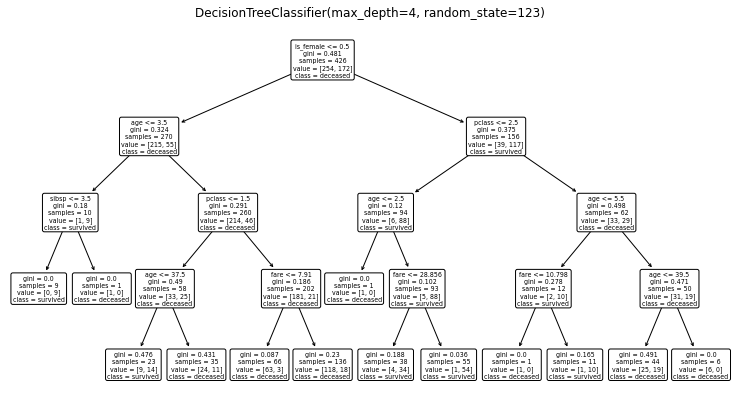

In [178]:
#need to use values because of the custom index setting ... i think. couldnt get it to work otherwise
comparison_chart['model2'] = fit_eval_compute(clf_titanic_b, X_train, y_train).values

0       0.830986
1     107.000000
2       7.000000
3     247.000000
4      65.000000
5       0.622093
6       0.027559
7       0.972441
8       0.377907
9       0.938596
10      0.748252
11    172.000000
12    254.000000
dtype: float64

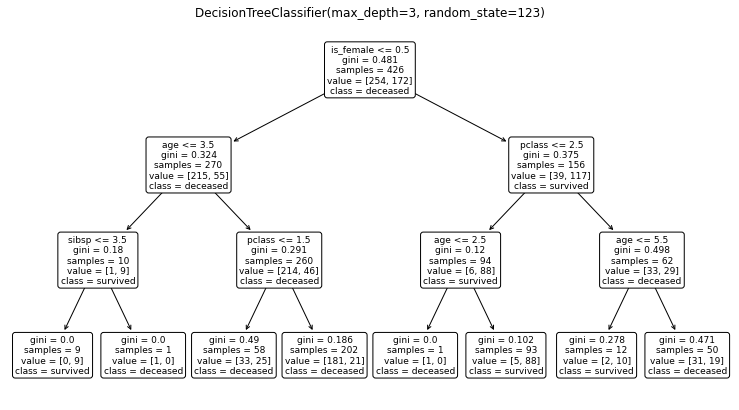

In [179]:
fit_eval_compute(clf_titanic, X_train, y_train)

In [180]:
comparison_chart

,model1,model2
Accuracy,0.830986,0.845070
True Positives,107.000000,121.000000
False Postives,7.000000,15.000000
True Negatives,247.000000,239.000000
False Negatives,65.000000,51.000000
TPR/Recall,0.622093,0.703488
False Positive Rate,0.027559,0.059055
True Negative Rate,0.972441,0.940945
False Negative Rate,0.377907,0.296512
Precision,0.938596,0.889706


array([8.45070423e-01, 1.21000000e+02, 1.50000000e+01, 2.39000000e+02,
       5.10000000e+01, 7.03488372e-01, 5.90551181e-02, 9.40944882e-01,
       2.96511628e-01, 8.89705882e-01, 7.85714286e-01, 1.72000000e+02,
       2.54000000e+02])

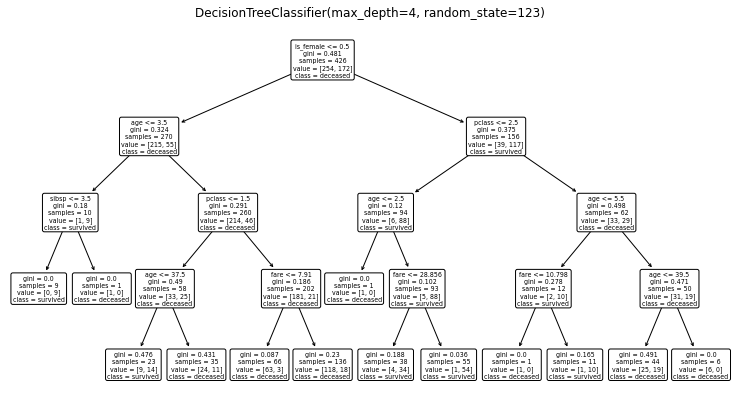

In [181]:
fit_eval_compute(clf_titanic_b, X_train, y_train).values

### Which model performs better on your in-sample data? This means which has a higher score I think. 

In [182]:
comp_chart = pd.DataFrame({
    'Actual/Target': y_train,
    'Baseline Prediction': 0,
    'model_1': clf_titanic.predict(X_train),
    'model_2': clf_titanic_b.predict(X_train)
})
comp_chart

,Actual/Target,Baseline Prediction,model_1,model_2
104,0,0,0,0
379,0,0,0,0
682,0,0,0,0
432,1,0,1,1
890,0,0,0,0
...,...,...,...,...
472,1,0,1,1
310,1,0,1,1
341,1,0,1,1
72,0,0,0,0


In [183]:
print(f'Scores\n-----')
print(f'Model 1: {clf_titanic.score(X_train, y_train)}')
print(f'Model 2: {clf_titanic_b.score(X_train, y_train)}')

Scores
-----
Model 1: 0.8309859154929577
Model 2: 0.8450704225352113


### Which model performs best on your out-of-sample data, the validate set?



In [184]:
print(f'Validate Scores\n-----')
print(f'Model 1: {clf_titanic.score(X_validate, y_validate)}')
print(f'Model 2: {clf_titanic_b.score(X_validate, y_validate)}')

Validate Scores
-----
Model 1: 0.7832167832167832
Model 2: 0.7692307692307693


## Work through these same exercises using the Telco dataset.


## Experiment with this model on other datasets with a higher number of output classes.

# Exercises - Random Forest

## Continue working in your `model` file with titanic data to do the following:


In [ ]:
#bringing down the baseline predictions 


### 1 - `Fit` the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [186]:
# first create classifier object --> will use [a, b, c ...] naming convention
rf_titanic_a = RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=123)


In [187]:
# do fitting with X_train and y_train --> the training data
rf_titanic_a.fit(X_train, y_train)

RandomForestClassifier()

Text(0.5, 1.0, 'Feature Importance')

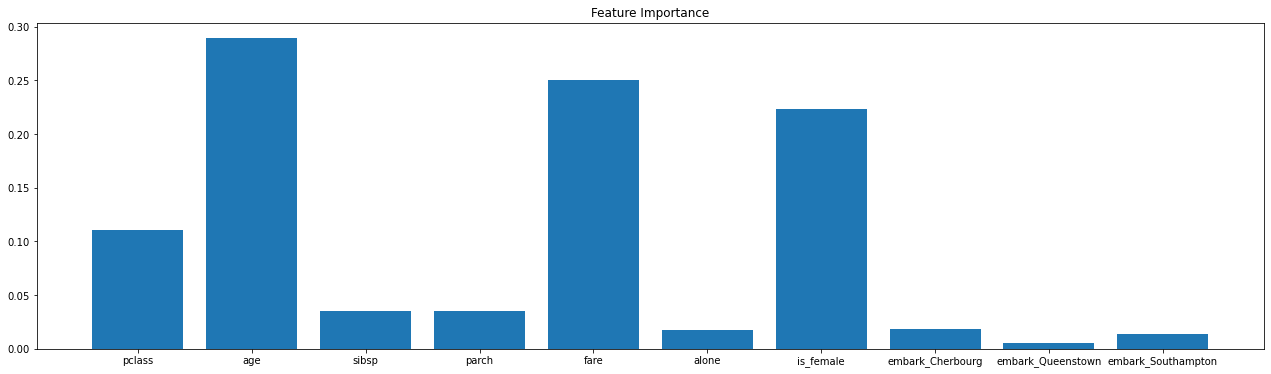

In [201]:
# highlight feature importance 
feat_importance = rf_titanic_a.feature_importances_
plt.figure(figsize=(22,6))
plt.bar(X_train.columns, feat_importance)
plt.title('Feature Importance')


In [207]:
rf_act_base_pred = pd.DataFrame({'Actual': y_train, 'Baseline': 0})
rf_act_base_pred 

,Actual,Baseline
104,0,0
379,0,0
682,0,0
432,1,0
890,0,0
...,...,...
472,1,0
310,1,0
341,1,0
72,0,0


In [208]:
# make predictions using model and attach them to dFrame that holds the actual values
y_predictions = rf_titanic_a.predict(X_train)
rf_act_base_pred['rf_a_pred'] = y_predictions

In [209]:
rf_act_base_pred

,Actual,Baseline,rf_a_pred
104,0,0,0
379,0,0,0
682,0,0,0
432,1,0,1
890,0,0,0
...,...,...,...
472,1,0,1
310,1,0,1
341,1,0,1
72,0,0,0


In [215]:
y_pred_proba = rf_titanic_a.predict_proba(X_train)
y_pred_proba

array([[0.975     , 0.025     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.19      , 0.81      ],
       [1.        , 0.        ],
       [0.03      , 0.97      ],
       [0.94      , 0.06      ],
       [0.12      , 0.88      ],
       [1.        , 0.        ],
       [0.01      , 0.99      ],
       [0.25      , 0.75      ],
       [0.04      , 0.96      ],
       [0.97      , 0.03      ],
       [0.98      , 0.02      ],
       [1.        , 0.        ],
       [0.82      , 0.18      ],
       [0.53483333, 0.46516667],
       [0.54333333, 0.45666667],
       [0.02      , 0.98      ],
       [0.29      , 0.71      ],
       [0.26      , 0.74      ],
       [0.82      , 0.18      ],
       [1.        , 0.        ],
       [0.99      , 0.01      ],
       [0.91      , 0.09      ],
       [0.17      , 0.83      ],
       [0.14      , 0.86      ],
       [0.99      , 0.01      ],
       [0.82      , 0.18      ],
       [0.98      , 0.02      ],
       [0.

### 2 - Evaluate your results using the model score, confusion matrix, and classification report.



In [217]:
#compute accuracy/score
rf_titanic_a_score = rf_titanic_a.score(X_train, y_train)
rf_titanic_a_score

0.9906103286384976

In [213]:
rf_a_report = classification_report(y_train, y_predictions)
print(rf_a_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       254
           1       0.99      0.98      0.99       172

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



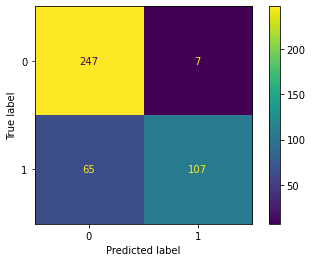

In [222]:
#create confusion matrix
rf_titanic_a_cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(rf_titanic_a_cm, display_labels=rf_titanic_a.classes_).plot();

### 3 - Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [228]:
#run fit_eval_compute functions to get the computes
rf_titanic_a_computes = fit_eval_compute(rf_titanic_a, X_train, y_train)

In [251]:
#create dFrame to hold computes starting with first model
rf_computes = pd.DataFrame({'Model A': rf_titanic_a_computes.values}, index=statistics)

In [252]:
rf_computes

,Model A
Accuracy/Score,0.990610
True Positives,168.000000
False Postives,0.000000
True Negatives,254.000000
False Negatives,4.000000
TPR/Recall,0.976744
False Positive Rate,0.000000
True Negative Rate,1.000000
False Negative Rate,0.023256
Precision,1.000000


### 4 - Run through steps increasing your min_samples_leaf and decreasing your max_depth.



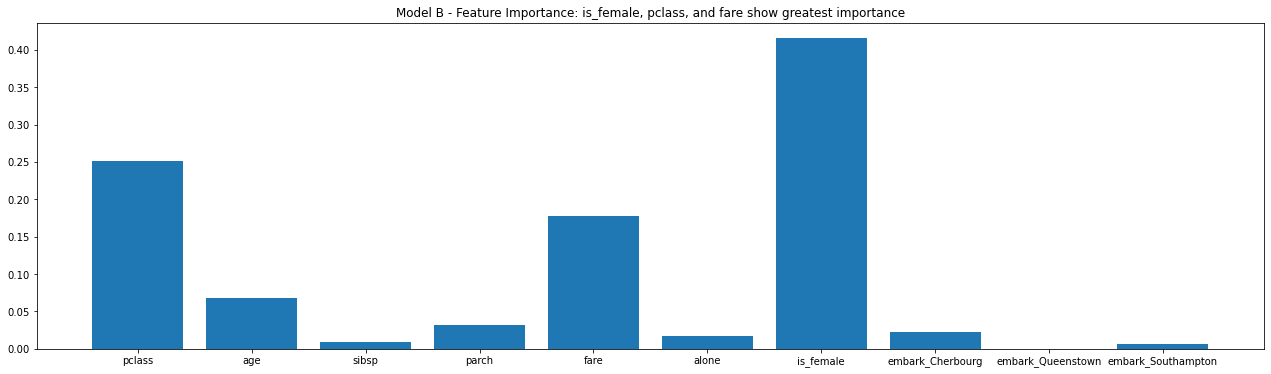

In [239]:
# first create classifier object --> will use [a, b, c ...] naming convention
rf_titanic_b = RandomForestClassifier(max_depth=5, min_samples_leaf=15, random_state=123)

# do fitting with X_train and y_train --> the training data
rf_titanic_b.fit(X_train, y_train)

# highlight feature importance 
rf_titanic_b_feat = rf_titanic_b.feature_importances_
plt.figure(figsize=(22,6))
plt.bar(X_train.columns, rf_titanic_b_feat)
plt.title('Model B - Feature Importance: is_female, pclass, and fare show greatest importance')

# make predictions using model and attach them to dFrame that holds the actual values
y_predictions_b = rf_titanic_b.predict(X_train)
rf_act_base_pred['rf_b_pred'] = y_predictions_b

#estimate probability
y_pred_proba = rf_titanic_b.predict_proba(X_train)



In [235]:
rf_act_base_pred

,Actual,Baseline,rf_a_pred,rf_b_pred
104,0,0,0,0
379,0,0,0,0
682,0,0,0,0
432,1,0,1,1
890,0,0,0,0
...,...,...,...,...
472,1,0,1,1
310,1,0,1,1
341,1,0,1,1
72,0,0,0,0


In [238]:
y_pred_proba[0:5]

array([[0.83372169, 0.16627831],
       [0.89242337, 0.10757663],
       [0.87115969, 0.12884031],
       [0.27856758, 0.72143242],
       [0.880501  , 0.119499  ]])

### 5a - What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



Score: 0.8075117370892019

Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.802817    0.816901  0.807512    0.809859      0.808504
recall       0.897638    0.674419  0.807512    0.786028      0.807512
f1-score     0.847584    0.738854  0.807512    0.793219      0.803683
support    254.000000  172.000000  0.807512  426.000000    426.000000


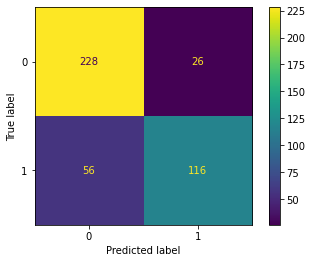

In [249]:
#compute accuracy/score
rf_titanic_b_score = rf_titanic_b.score(X_train, y_train)
print(f'Score: {rf_titanic_b_score}\n')

rf_b_report = classification_report(y_train, y_predictions_b, output_dict=True)
print(f'Classification Report\n-----\n{pd.DataFrame(rf_b_report)}')

#create confusion matrix
rf_titanic_b_cm = confusion_matrix(y_train, y_predictions_b)
ConfusionMatrixDisplay(rf_titanic_b_cm, display_labels=rf_titanic_b.classes_).plot();

In [255]:
rf_computes['Model B'] = fit_eval_compute(rf_titanic_b, X_train, y_train).values
rf_computes

,Model A,Model B
Accuracy/Score,0.990610,0.807512
True Positives,168.000000,116.000000
False Postives,0.000000,26.000000
True Negatives,254.000000,228.000000
False Negatives,4.000000,56.000000
TPR/Recall,0.976744,0.674419
False Positive Rate,0.000000,0.102362
True Negative Rate,1.000000,0.897638
False Negative Rate,0.023256,0.325581
Precision,1.000000,0.816901


### 6 - After making a few models, which one has the best performance (or closest metrics) on both train and validate?

# Exercises - KNN

Continue working in your model file with the titanic dataset.

### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [257]:
# create kNN object --> fill with n_neighbors and weights
knn_titanic_a = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [259]:
#fit model
knn_titanic_a.fit(X_train, y_train)


KNeighborsClassifier()

In [273]:
#make predictions
knn_titanic_a_pred = knn_titanic_a.predict(X_train)
knn_titanic_a_pred 

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [271]:
#estimate probability
knn_titanic_a_pred_proba = knn_titanic_a.predict_proba(X_train)
knn_titanic_a_pred_proba

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. ,

### Evaluate your results using the model score, confusion matrix, and classification report.



In [264]:
#compute accuracy/score 
print(f'Score: {knn_titanic_a.score(X_train, y_train)}')

Score: 0.7887323943661971


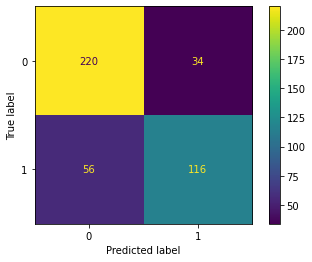

In [270]:
#create and display confusion matrix
knn_titanic_a_cm = confusion_matrix(y_train, knn__titanic_a_pred)
ConfusionMatrixDisplay(knn_titanic_a_cm, display_labels=knn_titanic_a.classes_).plot();

In [274]:
#create classification report
print(f'Classification Report\n-----\n{pd.DataFrame(classification_report(y_train, knn_titanic_a_pred, output_dict=True))}')

Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.797101    0.773333  0.788732    0.785217      0.787505
recall       0.866142    0.674419  0.788732    0.770280      0.788732
f1-score     0.830189    0.720497  0.788732    0.775343      0.785900
support    254.000000  172.000000  0.788732  426.000000    426.000000


### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [280]:
knn_computes = pd.DataFrame({'Model A': fit_eval_compute(knn_titanic_a, X_train, y_train).values}, index=statistics)
knn_computes

,Model A
Accuracy/Score,0.788732
True Positives,116.000000
False Postives,34.000000
True Negatives,220.000000
False Negatives,56.000000
TPR/Recall,0.674419
False Positive Rate,0.133858
True Negative Rate,0.866142
False Negative Rate,0.325581
Precision,0.773333


### Run through steps 2-4 setting k to 10


Score: 0.7582159624413145
Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.750831    0.776000  0.758216    0.763415      0.760993
recall       0.889764    0.563953  0.758216    0.726859      0.758216
f1-score     0.814414    0.653199  0.758216    0.733807      0.749323
support    254.000000  172.000000  0.758216  426.000000    426.000000


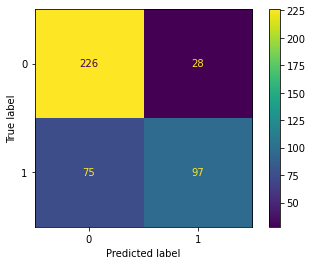

In [281]:
# create kNN object --> fill with n_neighbors and weights
knn_titanic_b = KNeighborsClassifier(n_neighbors=10, weights='uniform')
#fit model
knn_titanic_b.fit(X_train, y_train)

#make predictions
knn_titanic_b_pred = knn_titanic_b.predict(X_train)

#estimate probability
knn_titanic_b_pred_proba = knn_titanic_b.predict_proba(X_train)

#compute accuracy/score 
print(f'Score: {knn_titanic_b.score(X_train, y_train)}')

#create and display confusion matrix
knn_titanic_b_cm = confusion_matrix(y_train, knn_titanic_b_pred)
ConfusionMatrixDisplay(knn_titanic_b_cm, display_labels=knn_titanic_b.classes_).plot();

#create classification report
print(f'Classification Report\n-----\n{pd.DataFrame(classification_report(y_train, knn_titanic_b_pred, output_dict=True))}')
knn_computes['Model B'] = fit_eval_compute(knn_titanic_b, X_train, y_train).values

In [282]:
knn_computes

,Model A,Model B
Accuracy/Score,0.788732,0.758216
True Positives,116.000000,97.000000
False Postives,34.000000,28.000000
True Negatives,220.000000,226.000000
False Negatives,56.000000,75.000000
TPR/Recall,0.674419,0.563953
False Positive Rate,0.133858,0.110236
True Negative Rate,0.866142,0.889764
False Negative Rate,0.325581,0.436047
Precision,0.773333,0.776000


### Run through setps 2-4 setting k to 20


Score: 0.7370892018779343
Classification Report
-----
                    0           1  accuracy   macro avg  weighted avg
precision    0.743151    0.723881  0.737089    0.733516      0.735370
recall       0.854331    0.563953  0.737089    0.709142      0.737089
f1-score     0.794872    0.633987  0.737089    0.714429      0.729914
support    254.000000  172.000000  0.737089  426.000000    426.000000


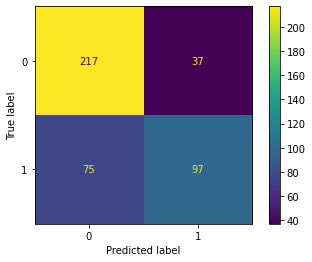

In [283]:
# create kNN object --> fill with n_neighbors and weights
knn_titanic_c = KNeighborsClassifier(n_neighbors=20, weights='uniform')
#fit model
knn_titanic_c.fit(X_train, y_train)

#make predictions
knn_titanic_c_pred = knn_titanic_c.predict(X_train)

#estimate probability
knn_titanic_c_pred_proba = knn_titanic_c.predict_proba(X_train)

#compute accuracy/score 
print(f'Score: {knn_titanic_c.score(X_train, y_train)}')

#create and display confusion matrix
knn_titanic_c_cm = confusion_matrix(y_train, knn_titanic_c_pred)
ConfusionMatrixDisplay(knn_titanic_c_cm, display_labels=knn_titanic_c.classes_).plot();

#create classification report
print(f'Classification Report\n-----\n{pd.DataFrame(classification_report(y_train, knn_titanic_c_pred, output_dict=True))}')
knn_computes['Model C'] = fit_eval_compute(knn_titanic_c, X_train, y_train).values

### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


In [284]:
knn_computes

,Model A,Model B,Model C
Accuracy/Score,0.788732,0.758216,0.737089
True Positives,116.000000,97.000000,97.000000
False Postives,34.000000,28.000000,37.000000
True Negatives,220.000000,226.000000,217.000000
False Negatives,56.000000,75.000000,75.000000
TPR/Recall,0.674419,0.563953,0.563953
False Positive Rate,0.133858,0.110236,0.145669
True Negative Rate,0.866142,0.889764,0.854331
False Negative Rate,0.325581,0.436047,0.436047
Precision,0.773333,0.776000,0.723881


### Which model performs best on our out-of-sample data from validate?

In [307]:
# create dFrame to hold validate scores
# to remember: adding scalar* value to dFrame requires brackets to make it list/like
validate_scores = pd.DataFrame(index=['score(accuracy)'])
for idx, model in enumerate([knn_titanic_a, knn_titanic_b, knn_titanic_c]):
    validate_scores[f'Model {idx+1}'] = [model.score(X_validate, y_validate)]

validate_scores

,Model 1,Model 2,Model 3
score(accuracy),0.622378,0.657343,0.657343
